# Final project

## The best neighborhood in Pittsburgh

### Haoliang Cheng, Enzo Grappone, Kevin Li


----

### 1. Import important packages in python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Import pupulation dataset

In [3]:
df_population= pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv")
df_firearms = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")

### 3. show dataset in table format

In [4]:
neighborhood_counts = df_firearms['neighborhood'].value_counts()
df_firearm = pd.DataFrame({'Neighborhood':neighborhood_counts.index,'Firearms_count':neighborhood_counts.values})


In [5]:
df_averagefirearms=pd.merge(df_population, df_firearm,on='Neighborhood',how='outer')
df_averagefirearms['AverageFirearms'] =  df_averagefirearms['Firearms_count']/df_averagefirearms['Estimate; Total']
df_averagefirearms_sorted = df_averagefirearms.sort_values(['AverageFirearms'], ascending=False)
df_averagefirearms_sorted

,Neighborhood,Id,Estimate; Total,Margin of Error; Total,Firearms_count,AverageFirearms
21,Chateau,22,3.0,3.000000,22.0,7.333333
71,South Shore,72,12.0,14.000000,12.0,1.000000
41,Homewood South,42,2276.0,320.068743,252.0,0.110721
57,North Shore,58,205.0,66.753277,16.0,0.078049
44,Larimer,45,1641.0,322.952009,107.0,0.065204
...,...,...,...,...,...,...
76,Squirrel Hill North,77,11336.0,767.783173,10.0,0.000882
82,Swisshelm Park,83,1345.0,106.000000,1.0,0.000743
26,East Carnegie,27,610.0,120.000000,NaN,NaN
55,New Homestead,56,973.0,105.000000,NaN,NaN


### 4.  show dataset in graph format

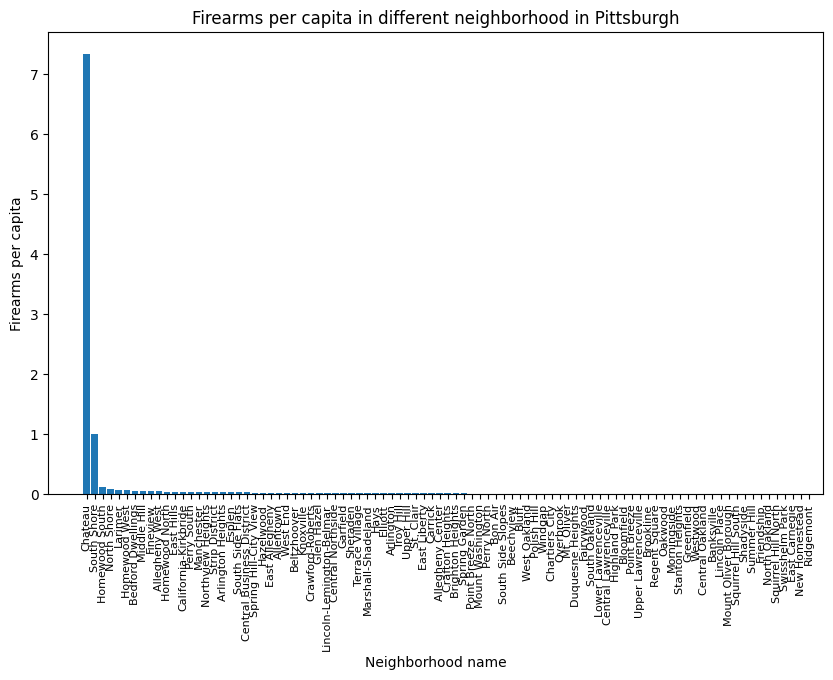

In [6]:
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(df_averagefirearms_sorted['Neighborhood'])),df_averagefirearms_sorted['AverageFirearms'], align = 'center')
plt.xticks(range(len(df_averagefirearms_sorted['Neighborhood'])), df_averagefirearms_sorted['Neighborhood'],\
               rotation = 90, fontsize = 8)
plt.xlabel('Neighborhood name')
plt.ylabel('Firearms per capita')
plt.title('Firearms per capita in different neighborhood in Pittsburgh')
plt.show()

### 5. Data Analysis

In [7]:
min_population=df_averagefirearms_sorted['Estimate; Total'].min()
print("The min population neighborhood is "+str(min_population)+". It is Chateau.")
max_firearms=df_averagefirearms_sorted['Firearms_count'].max()
print("The neighborhood with max number of firearms is "+str(max_firearms)+". It is Homewood South.")
max_average_firearms=df_averagefirearms_sorted['AverageFirearms'].max()
print("The neighborhood with max number of firearms per capita is "+str(max_average_firearms)+". It is Chateau.")

The min population neighborhood is 3.0. It is Chateau.
The neighborhood with max number of firearms is 252.0. It is Homewood South.
The neighborhood with max number of firearms per capita is 7.333333333333333. It is Chateau.


### 6. Conclusion
In the our project, the **Chateau** has the lesat people and the max number of firearms per capita. 
Therefore, it is the "Best" neighborhood in Pittsburgh.